In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)

In [2]:
def fetch_data(drop_some=True):

    df = pd.read_csv("abnormal_writeout.data.csv")

    if drop_some:
        # trascurare da ACC a UVM
        start_drop = df.columns.get_loc("ACC")
        end_drop = df.columns.get_loc("UVM")
        cols = np.arange(start_drop, end_drop + 1)
        df.drop(df.columns[cols], axis=1, inplace=True)

        # trascurare old_phylo_factor e la prima colonna
        df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
        df.drop("Unnamed: 0", axis=1, inplace=True)

    return df

In [3]:
df = fetch_data()
df.head()  # 85 columns remain.

,response,cds_length,occ_total_sum,oldest_phylostratum,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq,TTT_freq
0,0,-0.231676,-0.130244,1.901010,1.447504,1.190150,1.406066,0.022281,1.801757,-0.591137,0.472681,1.949397,-0.455623,-0.479855,0.577770,-0.254277,-0.303028,-0.093107,0.311667,-0.187624,-1.174934,-0.962971,-0.909913,-1.508122,-1.087512,-0.872773,1.602265,0.829956,-1.047882,-1.270695,1.036989,0.069038,-0.612966,-1.112302,-1.409381,-0.649559,-1.176062,-1.312306,0.391324,0.058646,-1.265710,0.384585,0.694620,1.409963,0.829268,1.797335,1.548229,0.903817,0.933719,-0.397981,-0.086160,1.414753,-0.346887,-1.243235,1.238157,0.943669,-0.824115,-0.356196,0.875956,1.696366,1.730229,0.054776,0.825449,1.145792,0.554808,-1.577040,0.447125,1.275182,-1.257541,-1.204038,-0.352835,-1.386701,-1.119012,-1.408061,0.539373,0.823120,-0.884699,0.161293,0.846379,0.539268,-0.628905,-1.111766,-0.365622,-1.157372,-0.412003
1,0,-0.479485,-0.225925,-0.683952,-1.218667,-0.855190,-0.428028,0.270554,-0.960246,-1.130393,-1.107698,-0.782452,-0.930966,2.172908,-0.728317,-0.208823,0.333337,-0.119886,-0.398704,-0.187624,0.584057,0.296533,1.149042,-0.065966,1.388289,1.197949,0.253892,-0.778624,-0.132201,1.166816,-1.541005,-0.402150,-1.145869,1.333728,0.803758,-0.693085,2.705568,0.155822,-0.765681,-0.887983,1.251116,-0.837808,-0.990130,-0.957495,-0.087426,-0.863659,-0.832224,-0.722976,-0.935078,-0.265076,0.174855,-0.599223,0.643374,1.017265,-0.225132,-0.370956,-0.282280,-0.689413,-1.277163,-0.978026,-0.930006,-0.676247,-0.838694,-0.038881,1.621418,-0.204153,-0.754478,-0.854915,0.639916,0.874857,1.208705,0.421527,1.247031,-0.065484,-0.327448,-0.151612,0.993725,0.200062,-0.895657,0.323194,-0.540768,2.205386,0.249155,1.918490,1.857967
2,1,-0.391241,-0.072836,-0.683952,0.482389,0.672705,0.928634,0.768924,0.019239,0.408770,0.695625,-0.699896,-0.723082,-0.479855,0.541861,0.772266,0.752547,-0.095956,0.083483,-0.187624,-0.427398,-0.104715,-0.181644,0.094350,-0.968550,0.069944,1.245460,0.097957,0.348878,0.087571,-0.020092,0.793797,-0.262386,-0.625139,-0.015744,0.063679,-0.847768,-0.097626,0.058707,0.230716,0.410751,1.302120,0.057532,-0.127896,0.624825,-0.388801,0.004821,0.294804,-0.559719,1.592316,-0.331791,0.390118,-0.739430,-0.674981,1.372832,0.379733,-0.626983,-0.528783,0.706419,-0.258796,0.598618,0.637801,0.690812,0.387350,0.448131,0.524565,-0.196243,-0.236192,-1.185901,-0.125129,0.573989,0.087986,-0.064738,-0.423978,-0.208042,0.784968,-1.144029,-0.571964,-0.053218,0.515054,-0.711053,-0.483593,-0.921655,-1.267833,-0.522241
3,0,0.296983,1.649415,-0.683952,-0.794498,-0.525282,-0.152416,0.003209,-0.815461,-0.437862,-0.461587,-0.723912,-0.569118,-0.479855,-1.137745,0.007207,0.798077,-0.111170,-0.178076,-0.187624,-0.190946,0.099659,0.298522,-0.005526,1.484987,0.713881,-0.454725,-0.193328,0.464364,0.145263,-0.500734,-0.893309,0.686977,0.905230,1.622440,0.609473,0.770784,1.164331,-0.696708,-0.068439,0.339796,-0.022302,-0.340180,-0.520962,-0.388488,-0.352416,-0.573491,-0.361055,-0.499743,-0.710679,-1.045508,-0.383306,0.040561,0.011920,1.428825,-0.734995,0.908960,-0.647483,-0.473808,-0.526752,-0.708639,-0.813613,-0.925574,-0.740244,0.185416,0.788469,-0.953331,0.313504,0.496344,1.057425,-0.315237,0.226605,1.158869,0.707721,-0.020972,-0.420635,-1.054114,1.616000,-0.07000

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
data = train_set.drop("response", axis=1)  # training set w/o labels
labels = train_set["response"].copy()  # labels

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Remove null values
        ("std_scaler", StandardScaler()),  # Feature scaling
    ]
)

data_num_tr = num_pipeline.fit_transform(data)
data_prepared = pd.DataFrame(data_num_tr, columns=data.columns)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(data_prepared, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
n_data = 100
some_data = data.iloc[:n_data]  # instances of the training set
some_labels = labels.iloc[:n_data]

some_data_prepared = num_pipeline.transform(some_data)
print("Predictions:\t", log_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels:		 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

data_predictions = log_reg.predict(data_prepared)  # predict on the training set
log_acc = accuracy_score(labels, data_predictions)  # acc
log_auc = roc_auc_score(labels, data_predictions)  # acc
print("Accuracy of", log_acc)
print("AUC:", log_auc)

Accuracy of 0.7879977210862822
AUC: 0.526876936163835


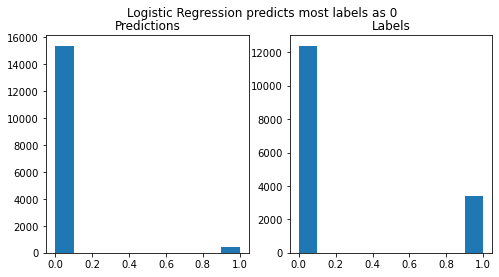

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(data_predictions)
ax[0].title.set_text("Predictions")
ax[1].hist(labels)
ax[1].title.set_text("Labels")
plt.suptitle("Logistic Regression predicts most labels as 0")
plt.show()

## P Values

In [10]:
from sklearn.feature_selection import f_regression

_, p = f_regression(data_prepared, labels)
# zip_iterator = zip(data_prepared.columns, p)
# dictionary = dict(zip_iterator)
# dictionary

## PCA

On all features except somatic mutations and evolutionary age.

In [46]:
# create new dataframe with the features to do PCA

data_PCA = data.copy()
data_PCA.drop(["occ_total_sum", "oldest_phylostratum"], axis=1, inplace=True)
data_PCA_tr = num_pipeline.fit_transform(data_PCA)
data_PCA = pd.DataFrame(data_PCA_tr, columns=data_PCA.columns)
data_PCA

,cds_length,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq,TTT_freq
0,0.169593,-0.943941,-1.127601,-1.120766,-1.123978,-1.004144,-1.017929,-1.058155,-0.891767,-0.774723,1.694687,-1.096158,-0.298965,0.510757,-0.127182,-0.333468,-0.211595,-0.501159,1.012930,1.365391,1.345904,0.470935,0.925084,-0.913359,-1.172034,0.596663,1.772408,-0.002430,-0.436615,1.080335,0.130182,1.658770,0.191563,0.434797,0.151276,-0.846303,1.276076,1.269025,-0.512191,-0.572700,-0.943240,-1.003989,-1.263564,-0.639329,-0.910889,-0.791519,0.417351,-0.291037,-0.658317,0.363895,1.808143,-0.078433,-0.696954,0.623508,0.315434,-1.016491,-0.625738,-0.638113,0.076272,-1.092485,-0.980860,-0.938926,-0.109376,0.155782,-1.035566,0.041510,0.599284,-0.740976,0.847048,0.005368,1.584976,-0.614982,-0.795205,0.834922,0.522531,-0.318077,-0.625462,-0.731992,0.243978,0.289910,0.482257,-0.061874
1,-0.215163,-0.895453,-1.073026,-1.412980,-1.435429,-0.862219,-1.189781,-1.489261,-0.953375,-1.179182,-0.494949,0.392996,-0.270730,0.766767,-0.127391,0.622746,4.620380,-0.340970,0.857270,1.570574,-0.532648,2.261869,1.756342,0.385486,-0.663638,-0.288149,1.632209,-1.631699,0.086294,-0.531234,0.142318,1.326263,1.260576,-0.034144,-0.666328,1.325468,-0.193438,0.629010,-1.899186,-0.565978,-0.784315,0.211480,-0.461358,-0.815877,-1.003042,-0.498570,-0.136441,-0.155621,-1.310883,0.364344,2.348346,-1.314589,0.999151,0.324835,-1.183292,-1.086785,-0.658994,-1.491881,0.861165,-1.028399,-0.240044,-1.002365,0.747921,-1.437715,1.357537,-0.871001,0.319904,-0.103548,-0.170437,-0.043889,2.775523,-1.468803,-1.293515,-0.247777,1.058482,-0.903488,-0.166246,1.685058,-0.391565,0.246928,-0.213523,-0.339606
2,-0.657023,1.244453,0.374001,0.173704,1.152394,1.839151,1.353998,1.080914,1.700017,1.232129,-0.494949,0.881290,0.736830,0.234591,-0.126778,-0.613564,-0.211595,-1.162856,-1.254736,-1.466544,-0.727320,-0.814880,-1.449416,-0.262880,0.132062,0.922270,0.195038,-0.046235,1.481327,-2.029174,-1.222822,-1.110304,-0.085553,-1.432460,-1.580714,-0.184310,1.542169,-0.415956,0.173441,1.019204,0.387656,1.774025,-0.504790,0.932331,-0.668558,0.454848,0.236227,-0.782510,3.605199,-0.067324,-0.651822,0.517308,0.293729,-1.325588,2.271157,2.221380,0.248978,2.772345,-1.092018,1.042465,-0.233562,-0.773879,0.309986,-1.486573,-0.464787,-1.434124,-0.785352,0.109699,-0.049443,-1.329770,-1.193374,-0.839135,-0.976563,-1.264238,-0.190790,5.222043,-0.614957,-0.726257,-1.223495,-1.377321,-0.466395,-1.385933
3,-0.100563,-1.367933,-0.718495,-0.679843,-0.595649,-0.237741,-0.535230,-0.670833,-0.445248,-0.624261,-0.494949,-0.190404,-0.107418,0.305981,-0.097691,0.108878,-0.211595,-0.351883,1.504018,0.870660,1.198255,1.708684,0.932431,-1.401608,-0.428293,-0.540824,1.044076,-0.293908,-1.034926,1.673964,1.362789,0.167584,0.474675,1.710220,1.245020,-0.374095,0.208316,0.887791,0.080720,-1.209654,-1.079166,-1.360104,-0.881673,-0.885745,-0.853991,-0.654172,-0.045625,-1.466239,-0.387320,-0.462520,0.952257,-1.224436,-1.114749,1.049348,0.445696,-1.019420,-0.761189,-0.281616,-0.880462,-1.003479,-1.076791,-1.350132,0.977190,0.438148,-1.136547,0.462809,1.938845,-0.554943,1.408568,0.685810,0.676342,0.044420,-1.054297,-0.075297,0.055270,0.148303,-1.074588,-0.097472,1.072130,1.332722,-0.147496,0.890540
4,-0.239974,-0.985864,-0.763688,-0.769961,-0.696458,-0.2

In [58]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_PCA)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

48


In [60]:
pca = PCA(n_components=d)
data_PCA_post = pca.fit_transform(data_PCA)
# print(pca.components_.T[:, 0]) # First PC
print("Account for 95% of variance:\n", pca.explained_variance_ratio_)

Account for 95% of variance:
 [0.3039349  0.07873271 0.0558045  0.0444041  0.03633407 0.02781453
 0.02442911 0.0208743  0.01910708 0.017921   0.01647871 0.01556944
 0.0146934  0.01409734 0.01364175 0.0127975  0.01222364 0.01188195
 0.01104944 0.01085884 0.01014228 0.00992374 0.00913276 0.00856239
 0.0084366  0.00805614 0.00794266 0.00767984 0.00757704 0.00720583
 0.00705193 0.00685337 0.00667704 0.00659608 0.00649565 0.00640418
 0.00628663 0.00615668 0.00603365 0.00596474 0.0057153  0.00555157
 0.00537493 0.0051305  0.00499173 0.00477504 0.00462743 0.00459253]


In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=["PC%s" % _ for _ in range(d)], index=data_PCA.columns)

# print(loadings["PC0"].to_string())

Okay, the PCA went well. Now I would like to... create some dataframes:
1. Original dataframe with minimal processing: df_A
2. Dataframe containing the features of interest and the confounder PCAs: df_B

In [64]:
df_B = pd.DataFrame(data_PCA_post, columns=["PC%s" % _ for _ in range(d)])
df_B

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,5.623272,-0.561144,2.859582,-0.241684,-0.744367,0.036621,-1.013430,-0.798355,-1.120447,1.059193,-0.759657,-1.032908,0.326737,0.974425,-0.844237,0.243211,-0.296703,-0.657651,0.344209,0.408454,-0.081025,-0.938286,0.392075,0.588585,0.431659,-0.159364,-0.169933,-0.835140,0.521258,-0.056098,-0.586474,-0.635441,0.299393,-0.625100,-0.471897,0.052282,0.300040,-0.716341,-0.294639,-0.700547,0.369227,-0.856723,-0.976762,0.477583,-0.662697,-0.337443,-0.170497,0.469512
1,5.222673,-0.258330,3.401644,-0.940088,0.332663,1.277732,2.630833,0.233497,4.608950,0.778348,-1.537902,-0.064399,2.820235,0.922924,0.866193,-1.028744,-1.362107,-0.427117,-0.557678,0.642038,-0.506312,1.457400,-0.161524,1.581862,-0.505531,-0.499023,-0.038994,0.341213,-0.183912,0.953489,-0.858842,-0.895441,-1.620466,-0.217143,0.003502,0.762281,-0.427874,0.027622,0.846330,0.593290,0.388595,0.027263,-0.923373,0.042496,0.276992,-1.258383,0.096417,0.186686
2,-6.425960,0.222388,-0.849936,2.282614,1.451917,-4.410401,1.900623,3.215494,-2.254026,1.994733,0.288673,0.007094,1.059726,1.371453,-1.322661,0.411685,-1.090438,0.038411,-0.787669,-0.599760,-1.005851,0.634209,0.195602,0.638738,-0.966507,0.794577,-0.407736,-0.317693,0.045639,-2.372866,0.358094,0.880642,0.157580,-1.837485,0.595975,-1.338660,-0.765055,0.120032,-1.770841,0.721366,1.264434,-1.817636,-0.955774,0.601453,-0.464257,-0.766312,0.651228,-0.762932
3,6.548332,-1.062568,0.446253,-0.193776,-1.057403,-1.787069,0.450126,-1.798588,-0.937187,0.707566,-0.303943,0.476955,-0.055771,0.512863,1.171273,0.087316,0.109548,0.384055,0.565690,-0.016601,-0.082282,-0.544164,0.513447,-0.530887,-0.089723,0.199884,-1.027042,-0.483923,0.525057,-0.157669,-0.116473,0.022520,0.415353,0.389794,-0.785790,-0.771187,-0.934440,0.909089,-0.687089,-0.386602,-0.242302,-0.417273,-0.330521,0.147712,0.749649,1.172551,-0.239718,-0.042214
4,5.054783,-1.418640,3.417197,0.335999,-0.085193,-0.103484,-0.084917,0.421013,-0.038486,0.005455,-1.545863,-1.418428,0.830276,0.194432,-0.415139,0.234423,-1.770823,0.158077,-1.080026,0.384683,-0.303456,-0.376940,0.575724,1.636642,-0.017334,-0.871829,-0.381312,-0.524010,0.659202,-0.267088,-1.016670,-0.383074,-0.783362,-0.197030,-0.219231,0.051561,-0.856630,-0.499419,0.026219,-0.802816,-0.456902,-0.903462,0.111417,0.588830,-0.375270,0.269479,-0.315681,0.057272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15792,1.098226,-0.643381,-1.509036,2.488102,0.467049,0.820120,-0.386389,0.217178,0.149672,0.824540,-0.747438,0.589339,0.025199,-0.540521,0.398771,-1.416642,0.901939,-0.823487,0.892516,0.273308,1.488773,1.666800,0.385206,-0.159984,-0.549830,0.938052,-0.263943,0.352202,0.244897,-0.265772,1.534987,-0.814860,-0.215198,-0.009152,-0.984136,0.280012,0.400540,0.184784,0.057138,-0.055579,-0.442684,-0.425024,-0.191443,0.518685,0.052340,0.297154,0.320721,0.593024
15793,5.672021,-1.137834,-1.477596,1.257197,-0.512386,-0.582908,0.473744,0.275339,-0.772978,0.109597,0.317406,0.559481,1.136543,0.240112,0.386325,0.509467,-0.600195,-0.092844,-0.792171,-0.220484,0.311856,-0.152541,0.073946,0.423568,0.976936,-0.050764,-0.048544,-0.757489,-1.262593,-0.771183,-0.671044,-0.346825,0.675880,-0.054440,0.485199,0.861303,-0.535104,-0.021621,1.123081,0.248081,0.223430,-0.513006,0.457868,0.176928,0.165036,0.088522,-0.371617,0.102106
15794,-1.356538,-1.648273,-0.674495,3.584521,-0.044099,-2.333470,-0.375930,0.204128,1.650113,0.331531,-1.333583,0.005609,0.170004,-0.639608,-0.091739,-0.148728,-0.235261,0.570050,-0.080226,0.566961,0.443589,-0.325284,-0.777229,-0.684597,0.785317,1.085416,-0.300132,-0.918062,-0.318198,-0.591474,0.968840,0.230934,0.926502,-0.606259,-1.160704,0.223731,0.14554

In [76]:
data.iloc[0]

cds_length             0.175294
occ_total_sum          0.118525
oldest_phylostratum   -0.448955
gc_cds                -0.945011
dnase_gene            -0.954265
                         ...   
TGT_freq              -0.734367
TTA_freq               0.245486
TTC_freq               0.285616
TTG_freq               0.484034
TTT_freq               0.205866
Name: 13300, Length: 84, dtype: float64

In [81]:
df_B = df_B.assign(occ_total_sum=data["occ_total_sum"].values, oldest_phylostratum=data["oldest_phylostratum"])

In [82]:
df_B

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,occ_total_sum,oldest_phylostratum
0,5.623272,-0.561144,2.859582,-0.241684,-0.744367,0.036621,-1.013430,-0.798355,-1.120447,1.059193,-0.759657,-1.032908,0.326737,0.974425,-0.844237,0.243211,-0.296703,-0.657651,0.344209,0.408454,-0.081025,-0.938286,0.392075,0.588585,0.431659,-0.159364,-0.169933,-0.835140,0.521258,-0.056098,-0.586474,-0.635441,0.299393,-0.625100,-0.471897,0.052282,0.300040,-0.716341,-0.294639,-0.700547,0.369227,-0.856723,-0.976762,0.477583,-0.662697,-0.337443,-0.170497,0.469512,0.118525,NaN
1,5.222673,-0.258330,3.401644,-0.940088,0.332663,1.277732,2.630833,0.233497,4.608950,0.778348,-1.537902,-0.064399,2.820235,0.922924,0.866193,-1.028744,-1.362107,-0.427117,-0.557678,0.642038,-0.506312,1.457400,-0.161524,1.581862,-0.505531,-0.499023,-0.038994,0.341213,-0.183912,0.953489,-0.858842,-0.895441,-1.620466,-0.217143,0.003502,0.762281,-0.427874,0.027622,0.846330,0.593290,0.388595,0.027263,-0.923373,0.042496,0.276992,-1.258383,0.096417,0.186686,0.214206,-0.683952
2,-6.425960,0.222388,-0.849936,2.282614,1.451917,-4.410401,1.900623,3.215494,-2.254026,1.994733,0.288673,0.007094,1.059726,1.371453,-1.322661,0.411685,-1.090438,0.038411,-0.787669,-0.599760,-1.005851,0.634209,0.195602,0.638738,-0.966507,0.794577,-0.407736,-0.317693,0.045639,-2.372866,0.358094,0.880642,0.157580,-1.837485,0.595975,-1.338660,-0.765055,0.120032,-1.770841,0.721366,1.264434,-1.817636,-0.955774,0.601453,-0.464257,-0.766312,0.651228,-0.762932,-0.589511,-0.683952
3,6.548332,-1.062568,0.446253,-0.193776,-1.057403,-1.787069,0.450126,-1.798588,-0.937187,0.707566,-0.303943,0.476955,-0.055771,0.512863,1.171273,0.087316,0.109548,0.384055,0.565690,-0.016601,-0.082282,-0.544164,0.513447,-0.530887,-0.089723,0.199884,-1.027042,-0.483923,0.525057,-0.157669,-0.116473,0.022520,0.415353,0.389794,-0.785790,-0.771187,-0.934440,0.909089,-0.687089,-0.386602,-0.242302,-0.417273,-0.330521,0.147712,0.749649,1.172551,-0.239718,-0.042214,0.003709,NaN
4,5.054783,-1.418640,3.417197,0.335999,-0.085193,-0.103484,-0.084917,0.421013,-0.038486,0.005455,-1.545863,-1.418428,0.830276,0.194432,-0.415139,0.234423,-1.770823,0.158077,-1.080026,0.384683,-0.303456,-0.376940,0.575724,1.636642,-0.017334,-0.871829,-0.381312,-0.524010,0.659202,-0.267088,-1.016670,-0.383074,-0.783362,-0.197030,-0.219231,0.051561,-0.856630,-0.499419,0.026219,-0.802816,-0.456902,-0.903462,0.111417,0.588830,-0.375270,0.269479,-0.315681,0.057272,0.041981,-0.683952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15792,1.098226,-0.643381,-1.509036,2.488102,0.467049,0.820120,-0.386389,0.217178,0.149672,0.824540,-0.747438,0.589339,0.025199,-0.540521,0.398771,-1.416642,0.901939,-0.823487,0.892516,0.273308,1.488773,1.666800,0.385206,-0.159984,-0.549830,0.938052,-0.263943,0.352202,0.244897,-0.265772,1.534987,-0.814860,-0.215198,-0.009152,-0.984136,0.280012,0.400540,0.184784,0.057138,-0.055579,-0.442684,-0.425024,-0.191443,0.518685,0.052340,0.297154,0.320721,0.593024,-0.149380,-0.683952
15793,5.672021,-1.137834,-1.477596,1.257197,-0.512386,-0.582908,0.473744,0.275339,-0.772978,0.109597,0.317406,0.559481,1.136543,0.240112,0.386325,0.509467,-0.600195,-0.092844,-0.792171,-0.220484,0.311856,-0.152541,0.073946,0.423568,0.976936,-0.050764,-0.048544,-0.757489,-1.262593,-0.771183,-0.671044,-0.346825,0.675880,-0.054440,0.485199,0.861303,-0.535104,-0.021621,1.123081,0.248081,0.223430,-0.513006,0.457868,0.176928,0.165036,0.088522,-0.371617,0.102106,0.137661,-0.448955
15794,-1.356538,-1.648273,-0.674495,3.584521,-0.044099,-2.333470,-0.375930,0.204128,1.650113,0.331531,-1.333583,0.005609,0.170004,-0.639608,-0.091739,-0.148728,-0.235261,0.570050,-0.080226,0.56